![alt](https://research.utm.my/wp-content/uploads/sites/26/2022/06/logo-300x122.png)
# Center for Artificial Intelligence and Robotics
### Universiti Teknologi Malaysia


#### Classification Inference - Resnet50

*Author: Dr. Ibrahim, Azzam, Thaqif & Syahmi*

In [1]:
import torch
from PIL import Image
import matplotlib.pyplot as plt
from torchvision import transforms

model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet50', pretrained=True)
model.eval()

Using cache found in /home/jupyter-thaqif/.cache/torch/hub/pytorch_vision_v0.10.0
/home/jupyter-thaqif/.conda/envs/envbaru/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/jupyter-thaqif/.conda/envs/envbaru/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

All pre-trained models expect input images normalized in the same way,
i.e. mini-batches of 3-channel RGB images of shape `(3 x H x W)`, where `H` and `W` are expected to be at least `224`.
The images have to be loaded in to a range of `[0, 1]` and then normalized using `mean = [0.485, 0.456, 0.406]`
and `std = [0.229, 0.224, 0.225]`.

Here's a sample execution.

In [2]:
# Download an example image from the pytorch website
# import urllib
# url, filename = ("https://github.com/pytorch/hub/raw/master/images/dog.jpg", "dog.jpg")
# try: urllib.URLopener().retrieve(url, filename)
# except: urllib.request.urlretrieve(url, filename)
# Load the image
filename = "test_images/cat_1.jpeg"
input_image = Image.open(filename)

In [3]:
# Preprocess the image
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0)  # create a mini-batch as expected by the model

# Move the input and model to GPU for speed if available
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

# Perform inference
with torch.no_grad():
    output = model(input_batch)
    
# Tensor of shape 1000, with confidence scores over ImageNet's 1000 classes
print(output[0])
# The output has unnormalized scores. To get probabilities, you can run a softmax on it.
probabilities = torch.nn.functional.softmax(output[0], dim=0)
# Get probabilities
probabilities = torch.nn.functional.softmax(output[0], dim=0)
print(probabilities)

tensor([-1.5821e+00, -1.0125e+00, -4.2198e+00, -2.8290e+00, -2.7682e+00,
        -2.4943e+00, -3.8226e+00, -1.3514e+00, -1.5599e+00, -2.3738e+00,
        -2.3301e+00, -3.6917e+00, -3.1812e-01, -2.4551e+00, -1.9195e+00,
        -2.9256e-02, -3.3494e+00, -3.0826e+00, -3.2497e-01, -3.5230e+00,
        -1.0358e+00, -1.3772e+00, -1.6252e+00, -1.9006e+00,  1.7073e+00,
        -2.7151e+00, -3.5809e+00, -2.7654e+00, -2.8931e+00, -2.0802e+00,
        -5.8905e-01, -2.7974e+00, -2.8480e+00, -3.2217e+00, -1.2462e+00,
        -1.1736e+00, -5.1458e-01, -6.4190e-01, -1.4710e+00,  6.1872e-01,
        -1.1662e+00,  4.2338e-01, -1.9962e+00, -1.9246e-02, -4.6305e-01,
        -1.8151e+00, -5.0873e-01, -9.4000e-01, -5.3662e-01, -4.0341e+00,
        -1.4116e+00,  5.5961e-01, -1.5025e+00, -2.8160e+00, -1.7646e+00,
        -3.1516e+00, -2.1007e+00, -3.3099e+00, -1.9161e+00, -1.1947e+00,
        -1.2045e+00, -5.3938e-01, -1.3522e+00, -1.6445e+00, -2.1650e+00,
        -3.6059e+00, -4.7088e-02,  8.0361e-01, -1.0

In [4]:
# Download and read ImageNet labels
!wget https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt
with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]

--2024-08-24 23:46:44--  https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10472 (10K) [text/plain]
Saving to: ‘imagenet_classes.txt’

imagenet_classes.tx 100%[===================>]  10.23K  --.-KB/s    in 0s      

2024-08-24 23:46:44 (77.4 MB/s) - ‘imagenet_classes.txt’ saved [10472/10472]



tabby 0.6469038724899292
tiger cat 0.22754527628421783
Egyptian cat 0.10307149589061737
space heater 0.001731590717099607
lynx 0.0016819123411551118


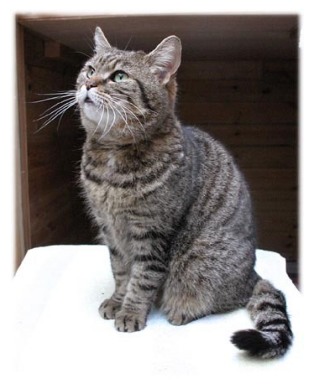

In [5]:
# Show top categories per image
top5_prob, top5_catid = torch.topk(probabilities, 5)
for i in range(top5_prob.size(0)):
    print(categories[top5_catid[i]], top5_prob[i].item())

# Display the image after predictions
plt.imshow(input_image)
plt.axis('off')  # Hide the axis
plt.show()

### Model Description

ResNet-50 is a deep residual network that has 50 layers. It was introduced in the paper "Deep Residual Learning for Image Recognition" and became one of the most widely used models in computer vision tasks.

### References

 - [Deep Residual Learning for Image Recognition](https://arxiv.org/abs/1512.03385)


# Plant Classification with ResNet-50

This section demonstrates how to load a custom-trained ResNet-50 model on a Jetson device, and use it for plant classification. The model is configured to classify images into three categories.

## Sections

1. Prerequisites
2. Import Necessary Libraries
3. Set Up the Device
4. Model Architecture
5. Load the Model Weights
6. Prediction Function
    - Function Definition
    - Usage
7. Example Usage
8. Conclusion
   

In [15]:
# Import necessery libraries
import torch
import torch.nn as nn
from torchvision.models import resnet50
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

# Ensure you are using the correct device (GPU on Jetson)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the model architecture
model = resnet50(pretrained=False)  # Set pretrained to False since we'll load custom weights
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 3)  # Adjust the output layer to match the number of classes

# Load the model weights
model_load_path = '___' # FIX ME # Replace with your model path
model.load_state_dict(torch.load(model_load_path, map_location=device))
model = model.to(device)
model.eval()  # Set the model to evaluation mode

print("Model loaded successfully.")

# Prediction function (reuse from earlier)
def predict_image(model, image_path, class_names):
    
    # Transform to match the training preprocessing
    transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
    
    # Load and preprocess the image
    image = Image.open(image_path).convert('RGB')
    image_tensor = transform(image)
    image_tensor = image_tensor.unsqueeze(0)  # Add batch dimension

    # Move the image to the device
    image_tensor = image_tensor.to(device)

    # Make prediction
    model.eval()
    with torch.no_grad():
        output = model(image_tensor)
        probabilities = torch.nn.functional.softmax(output, dim=1).cpu().numpy().squeeze()
        predicted_idx = probabilities.argmax()
    
    predicted_class = class_names[predicted_idx]
    confidence = probabilities[predicted_idx] * 100
    result = f"This image most likely belongs to {predicted_class} with a {confidence:.2f} percent confidence."
    
    # Display the image
    plt.imshow(image)
    plt.title(result)
    plt.axis('off')
    plt.show()
    
    return result, dict(zip(class_names, probabilities))

Model loaded successfully.


Here’s how you can use the predict_image function with actual class names and an image:

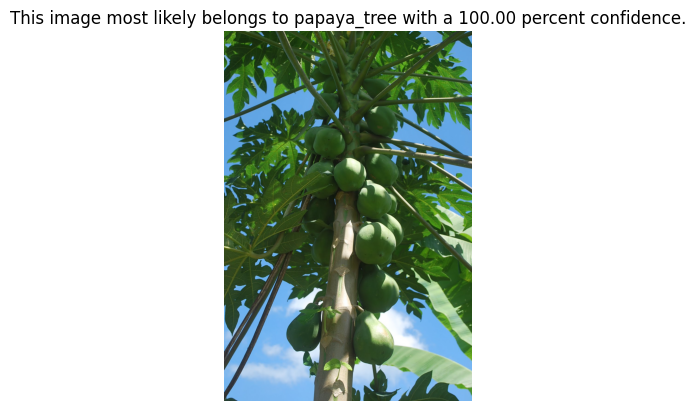

This image most likely belongs to papaya_tree with a 100.00 percent confidence.
Probabilities: {'banana_tree': 2.1197571e-05, 'curry_tree': 1.1754805e-05, 'papaya_tree': 0.999967}


In [16]:
# Example usage:
class_names = ['___', '___', '___'] 
image_path = 'testbetiktree.jpg'
result, probabilities = predict_image(model, image_path, class_names)
print(result)
print(f"Probabilities: {probabilities}")

## Conclusion
This notebook provides a template for loading and using a custom-trained ResNet-50 model on Jetson devices. Modify the code to suit your specific use case, such as adjusting the number of output classes or updating the image preprocessing steps.